In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("./data/data.csv")

## 1. Clean Up

In [39]:
df.head()

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1676939580000,2023-02-21 00:33:00,BTC/USD,24859.34,24859.34,24859.34,24859.34,0.000000,0.000000
1,1676939520000,2023-02-21 00:32:00,BTC/USD,24821.96,24859.34,24821.96,24859.34,0.103099,2562.977818
2,1676939460000,2023-02-21 00:31:00,BTC/USD,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178
3,1676939400000,2023-02-21 00:30:00,BTC/USD,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450
4,1676939340000,2023-02-21 00:29:00,BTC/USD,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766763 entries, 0 to 3766762
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Timestamp   int64  
 1   Date        object 
 2   Symbol      object 
 3   Open        float64
 4   High        float64
 5   Low         float64
 6   Close       float64
 7   Volume BTC  float64
 8   Volume USD  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 258.6+ MB


In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766763 entries, 0 to 3766762
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Timestamp   int64         
 1   Date        datetime64[ns]
 2   Symbol      object        
 3   Open        float64       
 4   High        float64       
 5   Low         float64       
 6   Close       float64       
 7   Volume BTC  float64       
 8   Volume USD  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 258.6+ MB


In [42]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [43]:
df.drop(['Symbol', 'Timestamp'], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,
2015-10-08 13:40:00,0.00,242.50,0.00,242.50,0.050000,12.125000
2015-10-08 13:41:00,242.50,242.95,242.50,242.95,0.001000,0.242950
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000,0.000000
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000,2.429600
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491,8.137003
...,...,...,...,...,...,...
2023-02-21 00:29:00,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431
2023-02-21 00:30:00,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450
2023-02-21 00:31:00,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178


## 2. Feature Engeneeinng

### 2.1 SMA

In [44]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()

In [45]:
df.tail(100)

,Open,High,Low,Close,Volume BTC,Volume USD,SMA_30,SMA_100
Date,,,,,,,,
2023-02-20 22:54:00,24750.14,24750.14,24748.87,24748.87,0.097488,2412.724768,24723.248000,24756.7925
2023-02-20 22:55:00,24748.87,24748.87,24721.39,24722.10,0.785044,19407.932811,24723.047333,24756.0294
2023-02-20 22:56:00,24722.10,24730.67,24714.47,24730.35,0.083787,2072.089996,24723.625333,24755.3244
2023-02-20 22:57:00,24730.35,24730.35,24715.82,24729.23,0.011925,294.904476,24724.559333,24754.6396
2023-02-20 22:58:00,24729.23,24729.23,24715.16,24715.40,0.003281,81.089992,24724.703000,24753.8165
...,...,...,...,...,...,...,...,...
2023-02-21 00:29:00,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431,24816.564667,24787.9160
2023-02-21 00:30:00,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450,24815.658333,24788.6809
2023-02-21 00:31:00,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178,24814.881000,24789.4845


In [46]:
df['Signal'] = 0
df.loc[df['Close'] < df['SMA_100'], 'Signal'] = 1
df.loc[df['Close'] > df['SMA_30'], 'Signal'] = -1
df.tail(100)


,Open,High,Low,Close,Volume BTC,Volume USD,SMA_30,SMA_100,Signal
Date,,,,,,,,,
2023-02-20 22:54:00,24750.14,24750.14,24748.87,24748.87,0.097488,2412.724768,24723.248000,24756.7925,-1
2023-02-20 22:55:00,24748.87,24748.87,24721.39,24722.10,0.785044,19407.932811,24723.047333,24756.0294,1
2023-02-20 22:56:00,24722.10,24730.67,24714.47,24730.35,0.083787,2072.089996,24723.625333,24755.3244,-1
2023-02-20 22:57:00,24730.35,24730.35,24715.82,24729.23,0.011925,294.904476,24724.559333,24754.6396,-1
2023-02-20 22:58:00,24729.23,24729.23,24715.16,24715.40,0.003281,81.089992,24724.703000,24753.8165,1
...,...,...,...,...,...,...,...,...,...
2023-02-21 00:29:00,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431,24816.564667,24787.9160,0
2023-02-21 00:30:00,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450,24815.658333,24788.6809,-1
2023-02-21 00:31:00,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178,24814.881000,24789.4845,-1


In [47]:
df['Signal'].value_counts()

Signal
-1    1837412
 1    1319249
 0     610102
Name: count, dtype: int64

In [48]:
df['Returns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Volume BTC,Volume USD,SMA_30,SMA_100,Signal,Returns
Date,,,,,,,,,,
2015-10-08 13:40:00,0.00,242.50,0.00,242.50,0.050000,12.125000,NaN,NaN,0,NaN
2015-10-08 13:41:00,242.50,242.95,242.50,242.95,0.001000,0.242950,NaN,NaN,0,0.001856
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000,0.000000,NaN,NaN,0,0.000000
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000,2.429600,NaN,NaN,0,0.000041
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491,8.137003,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-02-21 00:29:00,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431,24816.564667,24787.9160,0,0.000120
2023-02-21 00:30:00,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450,24815.658333,24788.6809,-1,0.000235
2023-02-21 00:31:00,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178,24814.881000,24789.4845,-1,0.000156


In [49]:
df['Strategy_Returns'] = df['Returns'] * df['Signal'].shift(1)
df['Strategy_Equity'] = df['Strategy_Returns'].cumsum() + 1 


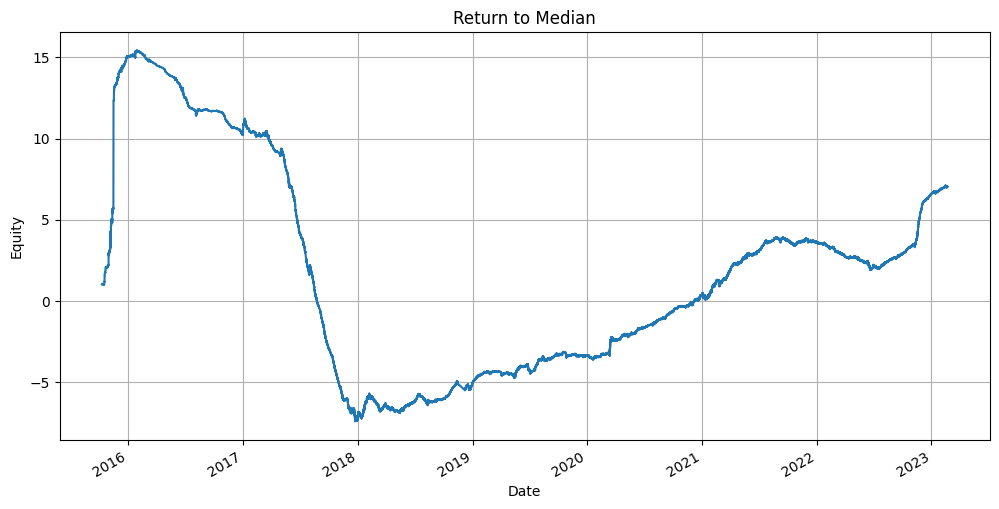

In [50]:
plt.figure(figsize=(12, 6))
df['Strategy_Equity'].plot()
plt.title('Return to Median')
plt.ylabel('Equity')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [51]:
df[['Returns', 'Signal', 'Strategy_Returns', 'Strategy_Equity']].tail(10)

,Returns,Signal,Strategy_Returns,Strategy_Equity
Date,,,,
2023-02-21 00:24:00,1.656109e-04,-1,0.000000,7.055759
2023-02-21 00:25:00,-4.846642e-04,0,0.000485,7.056244
2023-02-21 00:26:00,0.000000e+00,0,0.000000,7.056244
2023-02-21 00:27:00,0.000000e+00,0,0.000000,7.056244
2023-02-21 00:28:00,-4.030750e-07,0,-0.000000,7.056244
2023-02-21 00:29:00,1.201164e-04,0,0.000000,7.056244
2023-02-21 00:30:00,2.353676e-04,-1,0.000000,7.056244
2023-02-21 00:31:00,1.559346e-04,-1,-0.000156,7.056088
2023-02-21 00:32:00,1.505925e-03,-1,-0.001506,7.054582
